In [1]:
import pandas as pd 
import numpy as np


In [29]:
# ANALYSIS
pd.set_option('display.max_colwidth', None)
# PREPROCESSING
df  = pd.read_csv("results_259_Descriptive_norms-replication-XPLab-2021_group_7.csv")


In [30]:
responses = list(df['response'].iloc[1::7])
ingroup_agree = list(df['response'].iloc[5::7])
outgroup_disagree = list(df['response'].iloc[6::7])
ingroup_descriptive_norm = list(df['ingroup_descriptive_norm'].iloc[1::7].astype(int))
both_norms = list(df['both_norms_shown'].iloc[1::7].astype(int))


In [ ]:
#df_split = df[df['submission_id'].str.contains('Participants chose which action they preferred')]
#df_split = df_split['submission_id'].str.split('\,')
#df_split

4      [2344, , 1990, , 1, 1627307498488, Participants chose which action they preferred, 259, , 1, Participants chose which action they preferred, "Due to a computer error,  participants were not allocated equally to imagine performing the different actions", No data was saved during the experiment., The participants completed the experiment with their eyes closed., NA, NA, NA, NA, NA, "As mentioned before,  this study is a follow-up to a previous study. Given the information provided in the instructions,  which of the following statements about the previous study are true?", No data was saved during the experiment., Mon Jul 26 2021 15:50:11 GMT+0200 (Mitteleuropäische Sommerzeit), 1627307411423, 1.4510833333333333, NA, attention_trial, 1]
11    [2339, , 2502, 20, 1, 1627231365681, Participants chose which action they preferred, 259, male, 1, Participants chose which action they preferred, "Due to a computer error,  participants were not allocated equally to imagine performing the dif

In [33]:
frame = pd.DataFrame({'both_norms':both_norms,'ingroup_descriptive_norm':ingroup_descriptive_norm,'responses':responses,
                       'ingroup_agree':ingroup_agree,'outgroup_disagree':outgroup_disagree})
# both_norms: only ingroup norm shown -> 0
#             | both norms shown -> 1
# ingroup_descriptive norm: favoured calling the police -> -1 | leave him alone -> 1
# ingroup_agree: -3 - 3 range, change to binary
# outgroup_disagree: same 

frame

,both_norms,ingroup_descriptive_norm,responses,ingroup_agree,outgroup_disagree
0,1,1,0,3,-2
1,1,1,4,3,-3


In [34]:
# Adjust frame 

frame['ingroup_agree'].mask(frame['ingroup_agree'].astype(int) > 0, 1, inplace=True)
frame['ingroup_agree'].mask(frame['ingroup_agree'].astype(int) <= 0, 0, inplace=True)

frame['outgroup_disagree'].mask(frame['outgroup_disagree'].astype(int) > 0, 1, inplace=True)
frame['outgroup_disagree'].mask(frame['outgroup_disagree'].astype(int) <= 0, 0, inplace=True)
frame

,both_norms,ingroup_descriptive_norm,responses,ingroup_agree,outgroup_disagree
0,1,1,0,1,0
1,1,1,4,1,0


In [182]:

def clip_pdf(pdf,value):
  
  filter_array = pdf > value
  clipped_pdf = pdf[filter_array]
  clipped_pdf = np.append(clipped_pdf,clipped_pdf)

  if clipped_pdf.shape[0] < 10000:
    ext = np.random.choice(clipped_pdf, 10000-clipped_pdf.shape[0])
    clipped_pdf = np.append(clipped_pdf, ext)
  elif clipped_pdf.shape[0] > 10000:
    while clipped_pdf.shape[0] > 10000:
      index = np.random.randint(0,len(clipped_pdf))
      clipped_pdf = np.delete(clipped_pdf,index) 

  return clipped_pdf


In [189]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Create priors

# Clip to 0 (both)
b_in_scm = norm.rvs(0.816, 0.5, size=10000)
b_in_alt = norm.rvs(0.816, 0.5, size=10000)

# Clip to 0
b_out_scm = norm.rvs(0, 0.5, size=10000)
# OK
b_out_alt = b_in_alt * -(0.85/0.6)

#  OK 
b_both_smc = norm.rvs(0, 0.5, size=10000)
b_both_alt = norm.rvs(0, 0.5, size=10000)


In [190]:
b_in_scm = clip_pdf(b_in_scm,0)
b_in_alt = clip_pdf(b_in_alt,0)
b_both_smc = clip_pdf(b_both_smc,0)

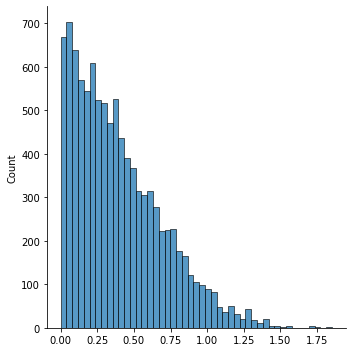

In [193]:
sns.displot(b_both_smc)

In [ ]:
# Instantiate Ordinal Log Model 

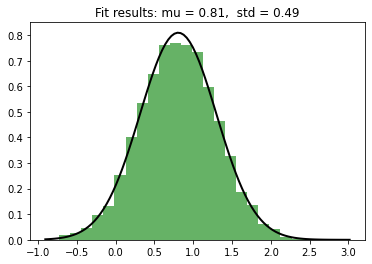

In [185]:
# Generate some data for this demonstration.
data = norm.rvs(0.816, 0.5, size=5000)

# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()